In [17]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
warnings.filterwarnings("ignore")

![Google Image](https://sp-uploads.s3.amazonaws.com/uploads%2Fservices%2F5709757%2F20221201174855_6388e907c4342_stroke_prediction_presentationpage0.jpg)



In [2]:
#defining the csv path
path_csv = "../Neuro_Ninjas/Resources/Stroke_prediction_Data.csv"

#reading the csv into pandas dataframe 
strokeinfo_df = pd.read_csv(path_csv)

#display the dataframe 
strokeinfo_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Distribution of BMI with stroke prone BMI group


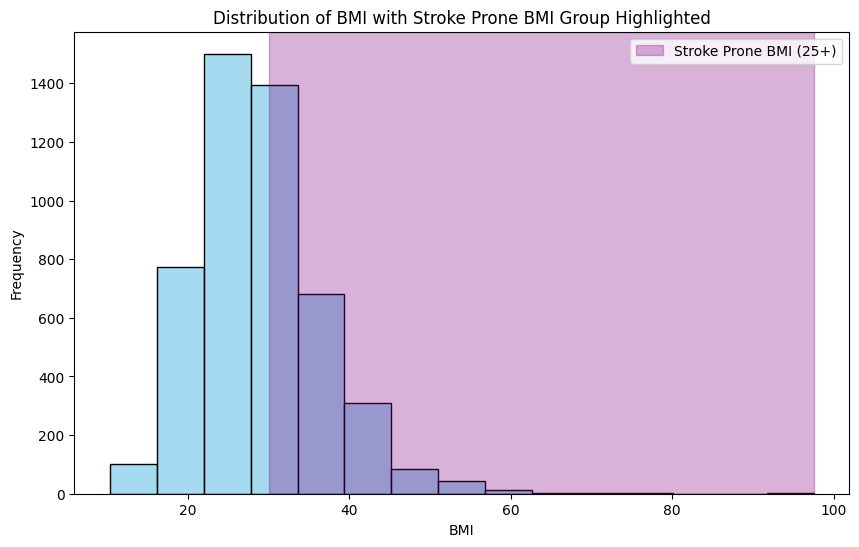

In [98]:
# Create the histogram 
plt.figure(figsize=(10, 6)) 
sns.histplot(strokeinfo_df['bmi'], bins=15, color='skyblue', kde=False)

# Highlight the stroke-prone BMI group (assumed to be BMI >= 25)
plt.axvspan(30, max(strokeinfo_df['bmi']), color='purple', alpha=0.3, label='Stroke Prone BMI (25+)')

# Add titles and labels 
plt.title('Distribution of BMI with Stroke Prone BMI Group Highlighted') 
plt.xlabel('BMI') 
plt.ylabel('Frequency') 
plt.legend(loc='upper right') 
plt.savefig("Images/BMI_STROKE.png")
plt.show()





BMI Categories:(collected from Google)
Underweight: BMI < 18.5

Normal weight: BMI 18.5 - 24.9

Overweight: BMI 25 - 29.9

Obesity: BMI ≥ 30

The graph illustrates the distribution of BMI among individuals.Notably, individuals falling in the average BMI group 25-40(over weight/obesity group) shown to have a higher propensity for strokes.

## Distribution of Age with Highlighted Stroke Prone Age Groups

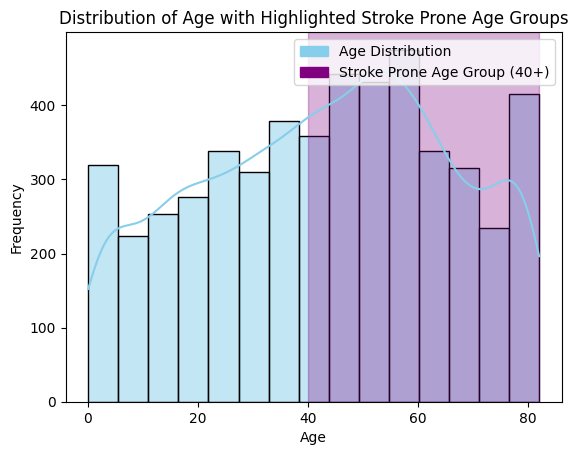

In [99]:
#plot the 'age' column
sns.histplot(strokeinfo_df['age'], bins=15, kde=True, color='skyblue')

# Highlight the stroke-prone age groups (60 and above) 
plt.axvspan(40, max(strokeinfo_df['age']), color='purple', alpha=0.3, label='Stroke Prone Age Group (40+)')

# Add titles and labels 
plt.title('Distribution of Age with Highlighted Stroke Prone Age Groups') 
plt.xlabel('Age') 
plt.ylabel('Frequency')

# Add a legend with patches
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='skyblue', label='Age Distribution'),
    Patch(facecolor='purple', edgecolor='purple', label='Stroke Prone Age Group (40+)')
] 
plt.legend(handles=legend_elements, loc='upper right')
plt.savefig("./images/Age_Stroke.png")
plt.show()



Based on the data, age emerges as a highly influential factor in predicting the risk of stroke. Individuals aged 40 and above are significantly more prone to experiencing strokes. This insight highlights the importance of monitoring and managing health factors, especially as individuals transition into their 40s and beyond. By focusing on this age group, preventive measures and early interventions can be more effectively targeted to reduce the risk of stroke.

## Relationship between Stroke and Average Glucose Level

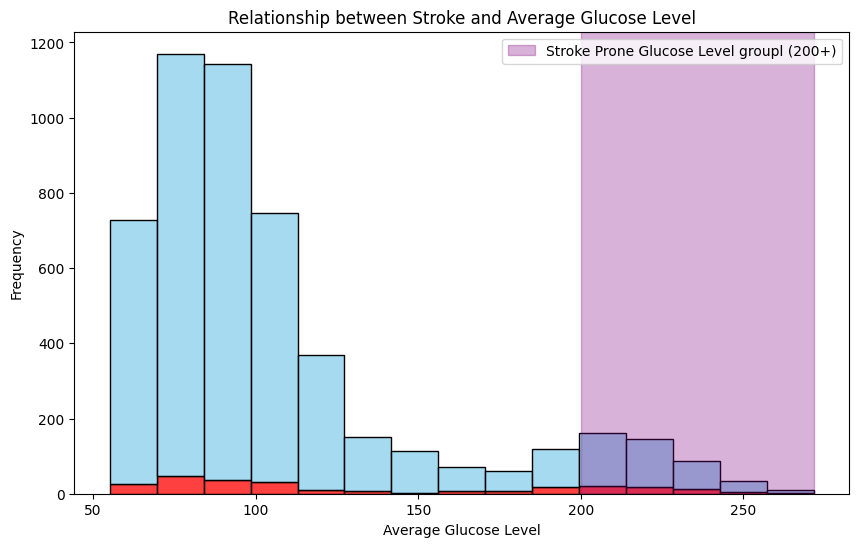

In [100]:
# Create the histogram 
plt.figure(figsize=(10, 6)) 
sns.histplot(strokeinfo_df,x='avg_glucose_level', hue='stroke', multiple='stack', palette={0: 'skyblue', 1: 'red'}, bins=15, kde=False)

# Highlight the most affected average glucose level group (above 200) 
plt.axvspan(200, max(strokeinfo_df['avg_glucose_level']), color='purple', alpha=0.3, label='Stroke Prone Glucose Level groupl (200+)')

# Add titles and labels 
plt.title('Relationship between Stroke and Average Glucose Level') 
plt.xlabel('Average Glucose Level') 
plt.ylabel('Frequency') 
plt.legend(loc='upper right') 
plt.savefig("./images/Average_Glucose_Level_and_Stroke.png")
plt.show()



High blood sugar levels, or hyperglycemia, can significantly increase the risk of stroke .

## Relationship between Stroke and Hypertension

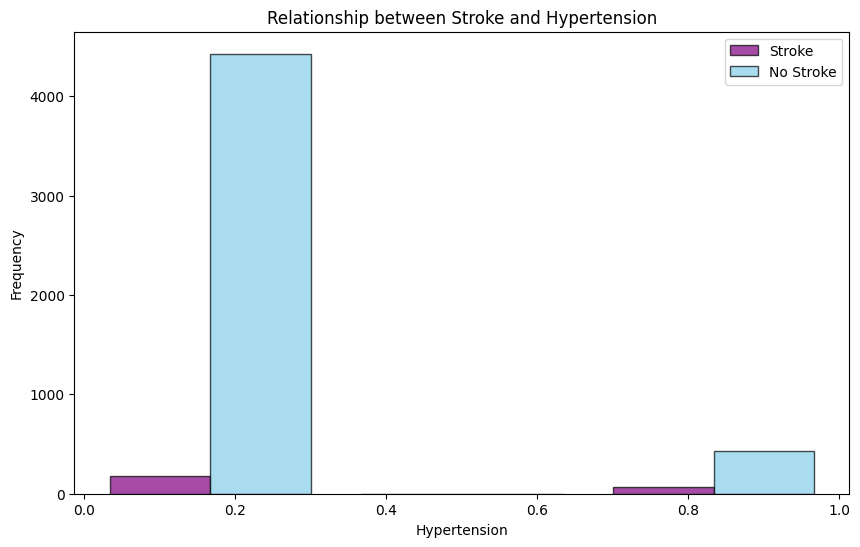

In [101]:
# Create the histogram 
plt.figure(figsize=(10, 6))

# Plot the histogram for stroke = 1 (yes) and stroke = 0 (no) separately
strokeinfo_df_yes_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 1] 
strokeinfo_df_no_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 0]

plt.hist([strokeinfo_df_yes_stroke['hypertension'], strokeinfo_df_no_stroke['hypertension']],bins=3, color=['purple', 'skyblue'], label=['Stroke', 'No Stroke'], alpha=0.7, edgecolor='black')
# Add titles and labels 
plt.title('Relationship between Stroke and Hypertension') 
plt.xlabel('Hypertension') 
plt.ylabel('Frequency') 
plt.legend(loc='upper right')
plt.savefig("./images/Stroke_and_Hypertension.png")
plt.show()



in this dataset 90% of the population is not hypertensive.


Individuals with hypertension (high blood pressure) are shown to have a higher frequency of strokes.The bar representing those with hypertension and having a stroke (purple) is significantly higher than the bar representing individuals without hypertension but having a stroke.

## Relationship between Stroke and Marital Status


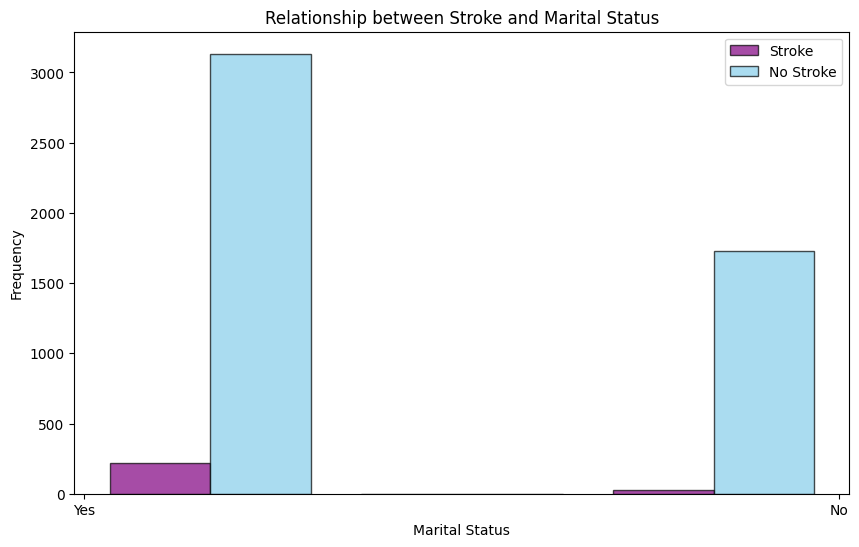

In [102]:
# Create the histogram 
plt.figure(figsize=(10, 6))

# Plot the histogram for stroke = 1 (yes) and stroke = 0 (no) separately
strokeinfo_df_yes_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 1] 
strokeinfo_df_no_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 0]

plt.hist([strokeinfo_df_yes_stroke['ever_married'], strokeinfo_df_no_stroke['ever_married']],bins=3, color=['purple', 'skyblue'], label=['Stroke', 'No Stroke'], alpha=0.7, edgecolor='black')
# Add titles and labels 
plt.title('Relationship between Stroke and Marital Status') 
plt.xlabel('Marital Status') 
plt.ylabel('Frequency') 
plt.legend(loc='upper right')
plt.savefig("./images/Stroke_Marital Status.png")
plt.show()



Patients who are married at a point in their life have stroke than those that have never married.

## Relationship between Stroke and Heart_Disease


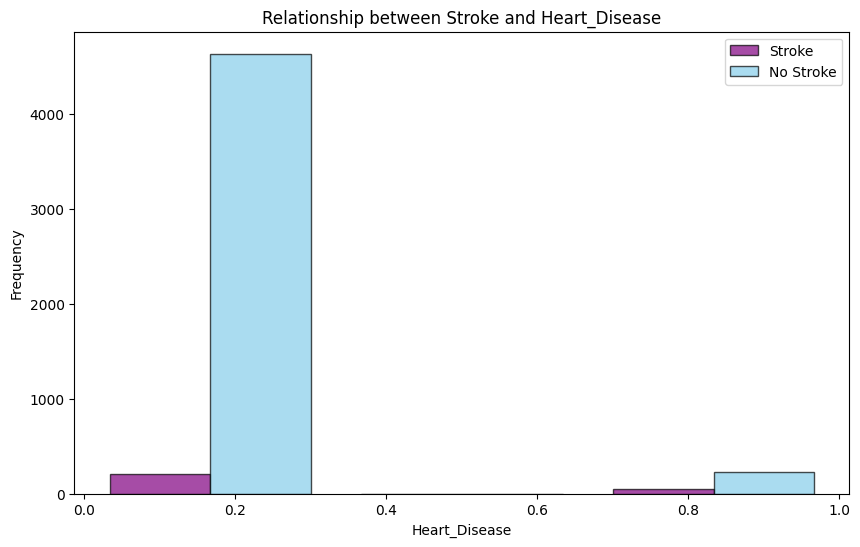

In [103]:
# Create the histogram 
plt.figure(figsize=(10, 6))

# Plot the histogram for stroke = 1 (yes) and stroke = 0 (no) separately
strokeinfo_df_yes_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 1] 
strokeinfo_df_no_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 0]

plt.hist([strokeinfo_df_yes_stroke['heart_disease'], strokeinfo_df_no_stroke['heart_disease']],bins=3, color=['purple', 'skyblue'], label=['Stroke', 'No Stroke'], alpha=0.7, edgecolor='black')
# Add titles and labels 
plt.title('Relationship between Stroke and Heart_Disease') 
plt.xlabel('Heart_Disease') 
plt.ylabel('Frequency') 
plt.legend(loc='upper right')
plt.savefig("./images/Stroke_and_Heart_Disease.png")
plt.show()




Most of the patients are healthy in terms of heart_diease in this dataset.


Individuals with Heart_Disease  are shown to have a higher frequency of strokes.The bar representing those with Heart_Disease and having a stroke (purple) is significantly higher than the bar representing individuals without Heart_Disease but having a stroke.


PS -However The ratio of having heart_disease:stroke is much meaninful compared to having(no) heart_disease:stroke .

## Relationship between Stroke and Gender


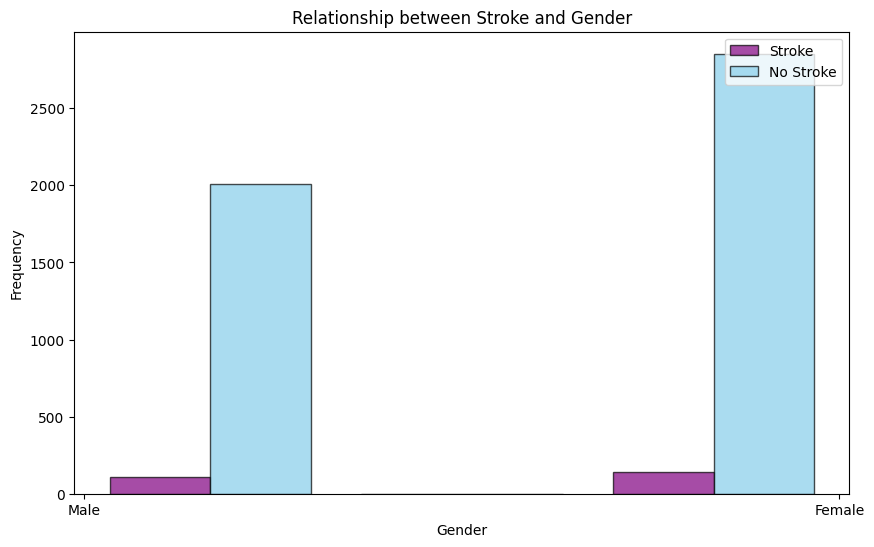

In [105]:
# Create the histogram 
plt.figure(figsize=(10, 6))

# Plot the histogram for stroke = 1 (yes) and stroke = 0 (no) separately
strokeinfo_df_yes_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 1] 
strokeinfo_df_no_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 0]

plt.hist([strokeinfo_df_yes_stroke['gender'], strokeinfo_df_no_stroke['gender']],bins=3, color=['purple', 'skyblue'], label=['Stroke', 'No Stroke'], alpha=0.7, edgecolor='black')
# Add titles and labels 
plt.title('Relationship between Stroke and Gender') 
plt.xlabel('Gender') 
plt.ylabel('Frequency') 
plt.legend(loc='upper right')
plt.savefig("./images/Stroke_Gender.png")
plt.show()



1.There are more females as compared to males.The Patients with "other" has been recatagorsed to female .This way we'll have just 2 catagories in the cloumn . 

2.Very less amount of population tends have have stroke gender wise as per the dataset.


## Relationship between Stroke and work_type


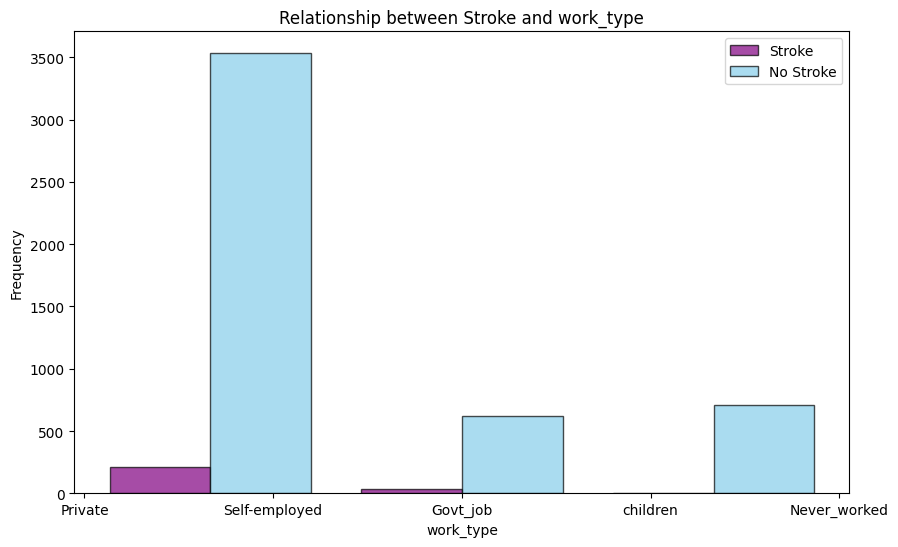

In [106]:
# Create the histogram 
plt.figure(figsize=(10, 6))

# Plot the histogram for stroke = 1 (yes) and stroke = 0 (no) separately
strokeinfo_df_yes_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 1] 
strokeinfo_df_no_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 0]

plt.hist([strokeinfo_df_yes_stroke['work_type'], strokeinfo_df_no_stroke['work_type']],bins=3, color=['purple', 'skyblue'], label=['Stroke', 'No Stroke'], alpha=0.7, edgecolor='black')
# Add titles and labels 
plt.title('Relationship between Stroke and work_type') 
plt.xlabel('work_type') 
plt.ylabel('Frequency') 
plt.legend(loc='upper right')
plt.savefig("./images/Stroke_and_work_type.png")
plt.show()



more than 50% of population work at Private sector and tend to higher tendecy for stroke in this dataset

## Relationship between Stroke and Residence_type

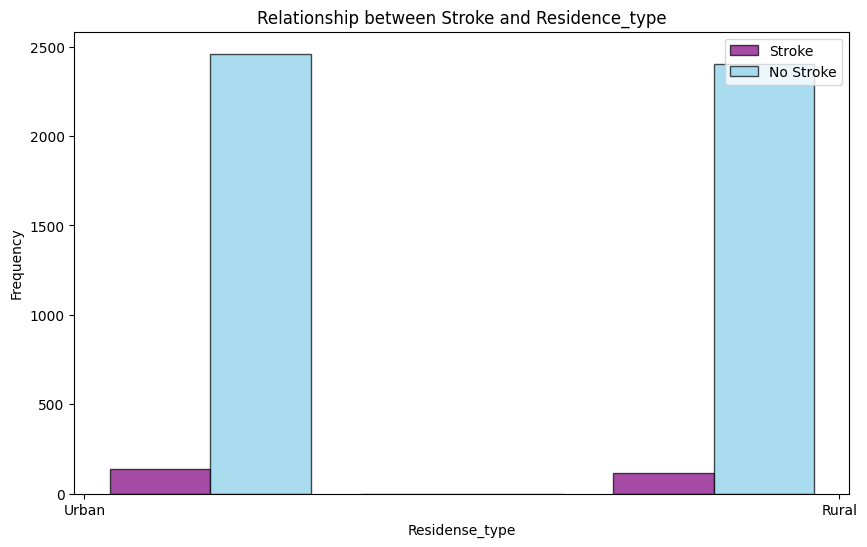

In [107]:
# Create the histogram 
plt.figure(figsize=(10, 6))

# Plot the histogram for stroke = 1 (yes) and stroke = 0 (no) separately
strokeinfo_df_yes_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 1] 
strokeinfo_df_no_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 0]

plt.hist([strokeinfo_df_yes_stroke['Residence_type'], strokeinfo_df_no_stroke['Residence_type']],bins=3, color=['purple', 'skyblue'], label=['Stroke', 'No Stroke'], alpha=0.7, edgecolor='black')
# Add titles and labels 
plt.title('Relationship between Stroke and Residence_type') 
plt.xlabel('Residense_type') 
plt.ylabel('Frequency') 
plt.legend(loc='upper right')
plt.savefig("./images/Stroke_and_Residence_type.png")
plt.show()



almost equal amount of patient population in the rural and urban area. but people living in the urban area are more prone to srtoke in this dataset.

## Relationship between Stroke and Smoking_Status


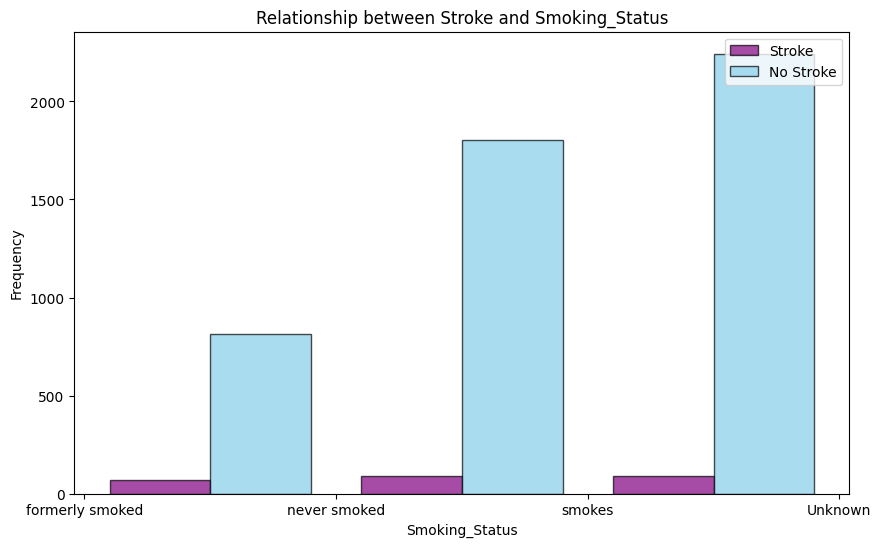

In [108]:
# Create the histogram 
plt.figure(figsize=(10, 6))

# Plot the histogram for stroke = 1 (yes) and stroke = 0 (no) separately
strokeinfo_df_yes_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 1] 
strokeinfo_df_no_stroke = strokeinfo_df[strokeinfo_df['stroke'] == 0]

plt.hist([strokeinfo_df_yes_stroke['smoking_status'], strokeinfo_df_no_stroke['smoking_status']],bins=3, color=['purple', 'skyblue'], label=['Stroke', 'No Stroke'], alpha=0.7, edgecolor='black')
# Add titles and labels 
plt.title('Relationship between Stroke and Smoking_Status') 
plt.xlabel('Smoking_Status') 
plt.ylabel('Frequency') 
plt.legend(loc='upper right')
plt.savefig("./images/Stroke_and_Smoking_Status.png")
plt.show()



Though the dateset represents a large amonut of population who never smoked and unknown still Combination of patients that formerly smoked and those that smokes have stroke than those that never smoked/unknown .
